# TASK 1:

You are working for a car dealership company aiming to enhance its pricing strategy.

The company has collected a vast dataset containing various attributes of cars, including features such as mileage, horsepower, number of doors, brand, model year, and more. Your task is to develop a robust machine learning model to predict car prices accurately based on these features.

Download the dataset

● Perform necessary EDA and Data Wrangling

● Implement Linear Regression

● Evaluate LR using different metrics

● Plot training and testing results

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
car_data = pd.read_csv('/content/CarPrice_Assignment.csv')

In [ ]:
print("Dataset Preview:")
print(car_data.head())

Dataset Preview:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  p

In [ ]:
print("\nMissing values in each column:")
print(car_data.isnull().sum())


Missing values in each column:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
print("\nDataset Information:")
print(car_data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 

In [ ]:
print("\nDescriptive Statistics:")
print(car_data.describe())


Descriptive Statistics:
           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.68020

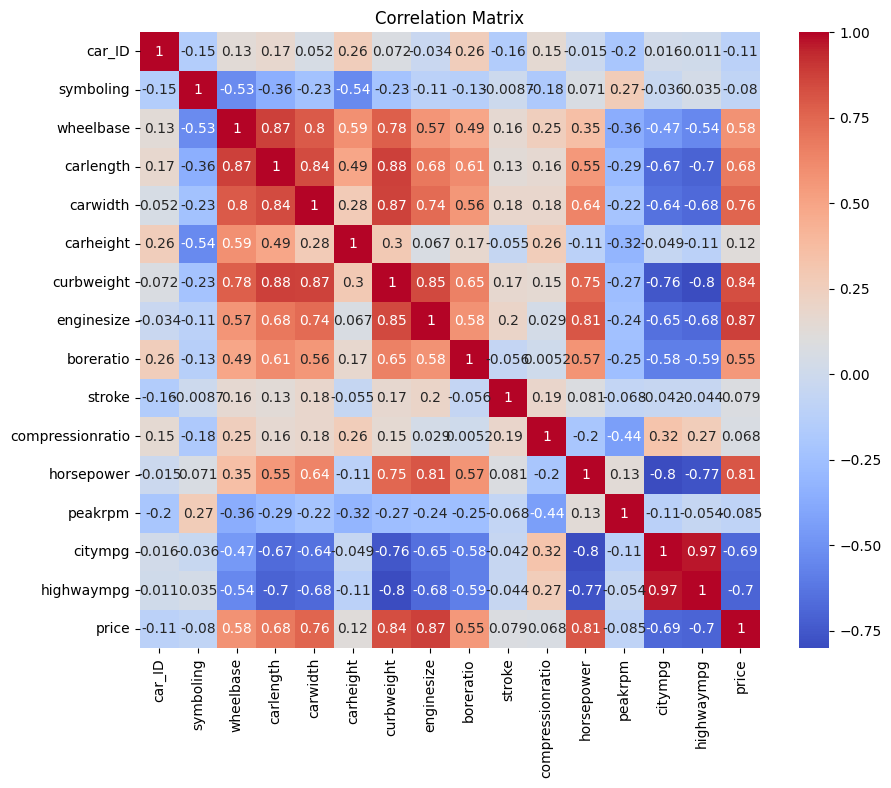

In [ ]:
plt.figure(figsize=(10, 8))
numerical_data = car_data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = car_data[['horsepower', 'curbweight', 'enginesize', 'highwaympg']]
y = car_data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [ ]:
print(f"\nTraining RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")
print(f"Training R^2: {train_r2}")
print(f"Testing R^2: {test_r2}")


Training RMSE: 3358.4125052706418
Testing RMSE: 3790.425435708013
Training R^2: 0.8108761978984008
Testing R^2: 0.8180061666029927


<ipython-input-23-84e613a19f7c>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, color='red')


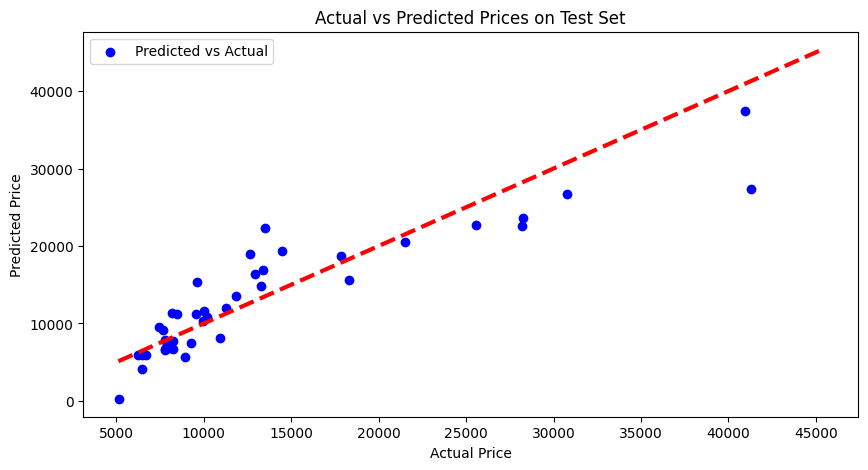

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices on Test Set')
plt.legend()
plt.show()

# TASK 2:

Scenario:

You are provided with a dataset and your task is to determine whether applying linear regression is
appropriate. Remember the fundamental assumptions of linear regression while making your decision.

Dataset Description:

The dataset contains numerical values representing various factors related to monthly electricity consumption in households. The features include the number of residents, average income, and the
age of the house. The target variable is the monthly electricity consumption in kilowatt-hours.

Task Instructions:

Review the Dataset:
Familiarize yourself with the dataset, noting the features and the target variable.

Assumption Consideration:
Reflect on the key assumptions of linear regression: linearity, independence, homoscedasticity,
normality of residuals, and absence of perfect multicollinearity.
Think about how these assumptions relate to the dataset. Consider whether the data might meet these assumptions or present challenges.

Decision Making:
Based solely on your understanding of the assumptions and by doing analysis, decide whether linear
regression is suitable for this dataset. Provide a brief rationale for your decision.

Justification:
If you decided that linear regression is appropriate, outline why you believe the dataset meets the assumptions. If you decided against linear regression, briefly explain which assumptions you think
the dataset violates.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
elec_data = pd.read_csv('/content/electricity_bill_dataset.csv')

In [ ]:
print("Dataset Preview:")
print(elec_data.head())

Dataset Preview:
   Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4           3225.6  
1  

In [ ]:
print("\nMissing values in each column:")
print(elec_data.isnull().sum())


Missing values in each column:
Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64


In [ ]:
print("\nDescriptive Statistics:")
print(elec_data.describe())


Descriptive Statistics:
                Fan  Refrigerator  AirConditioner    Television       Monitor  \
count  45345.000000  45345.000000    45345.000000  45345.000000  45345.000000   
mean      13.990694     21.705458        1.503959     12.502635      2.865057   
std        5.470816      1.672575        1.115482      5.756007      3.894933   
min        5.000000     17.000000        0.000000      3.000000      1.000000   
25%        9.000000     22.000000        1.000000      7.000000      1.000000   
50%       14.000000     22.000000        2.000000     13.000000      1.000000   
75%       19.000000     23.000000        2.000000     17.000000      1.000000   
max       23.000000     23.000000        3.000000     22.000000     12.000000   

       MotorPump         Month  MonthlyHours    TariffRate  ElectricityBill  
count    45345.0  45345.000000  45345.000000  45345.000000     45345.000000  
mean         0.0      6.488058    515.083207      8.369648      4311.771307  
std        

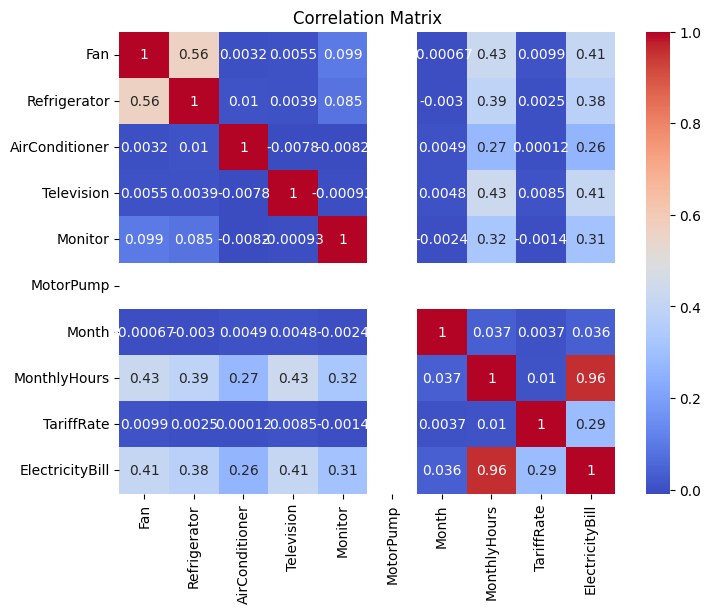

In [ ]:
plt.figure(figsize=(8, 6))
numerical_data = elec_data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

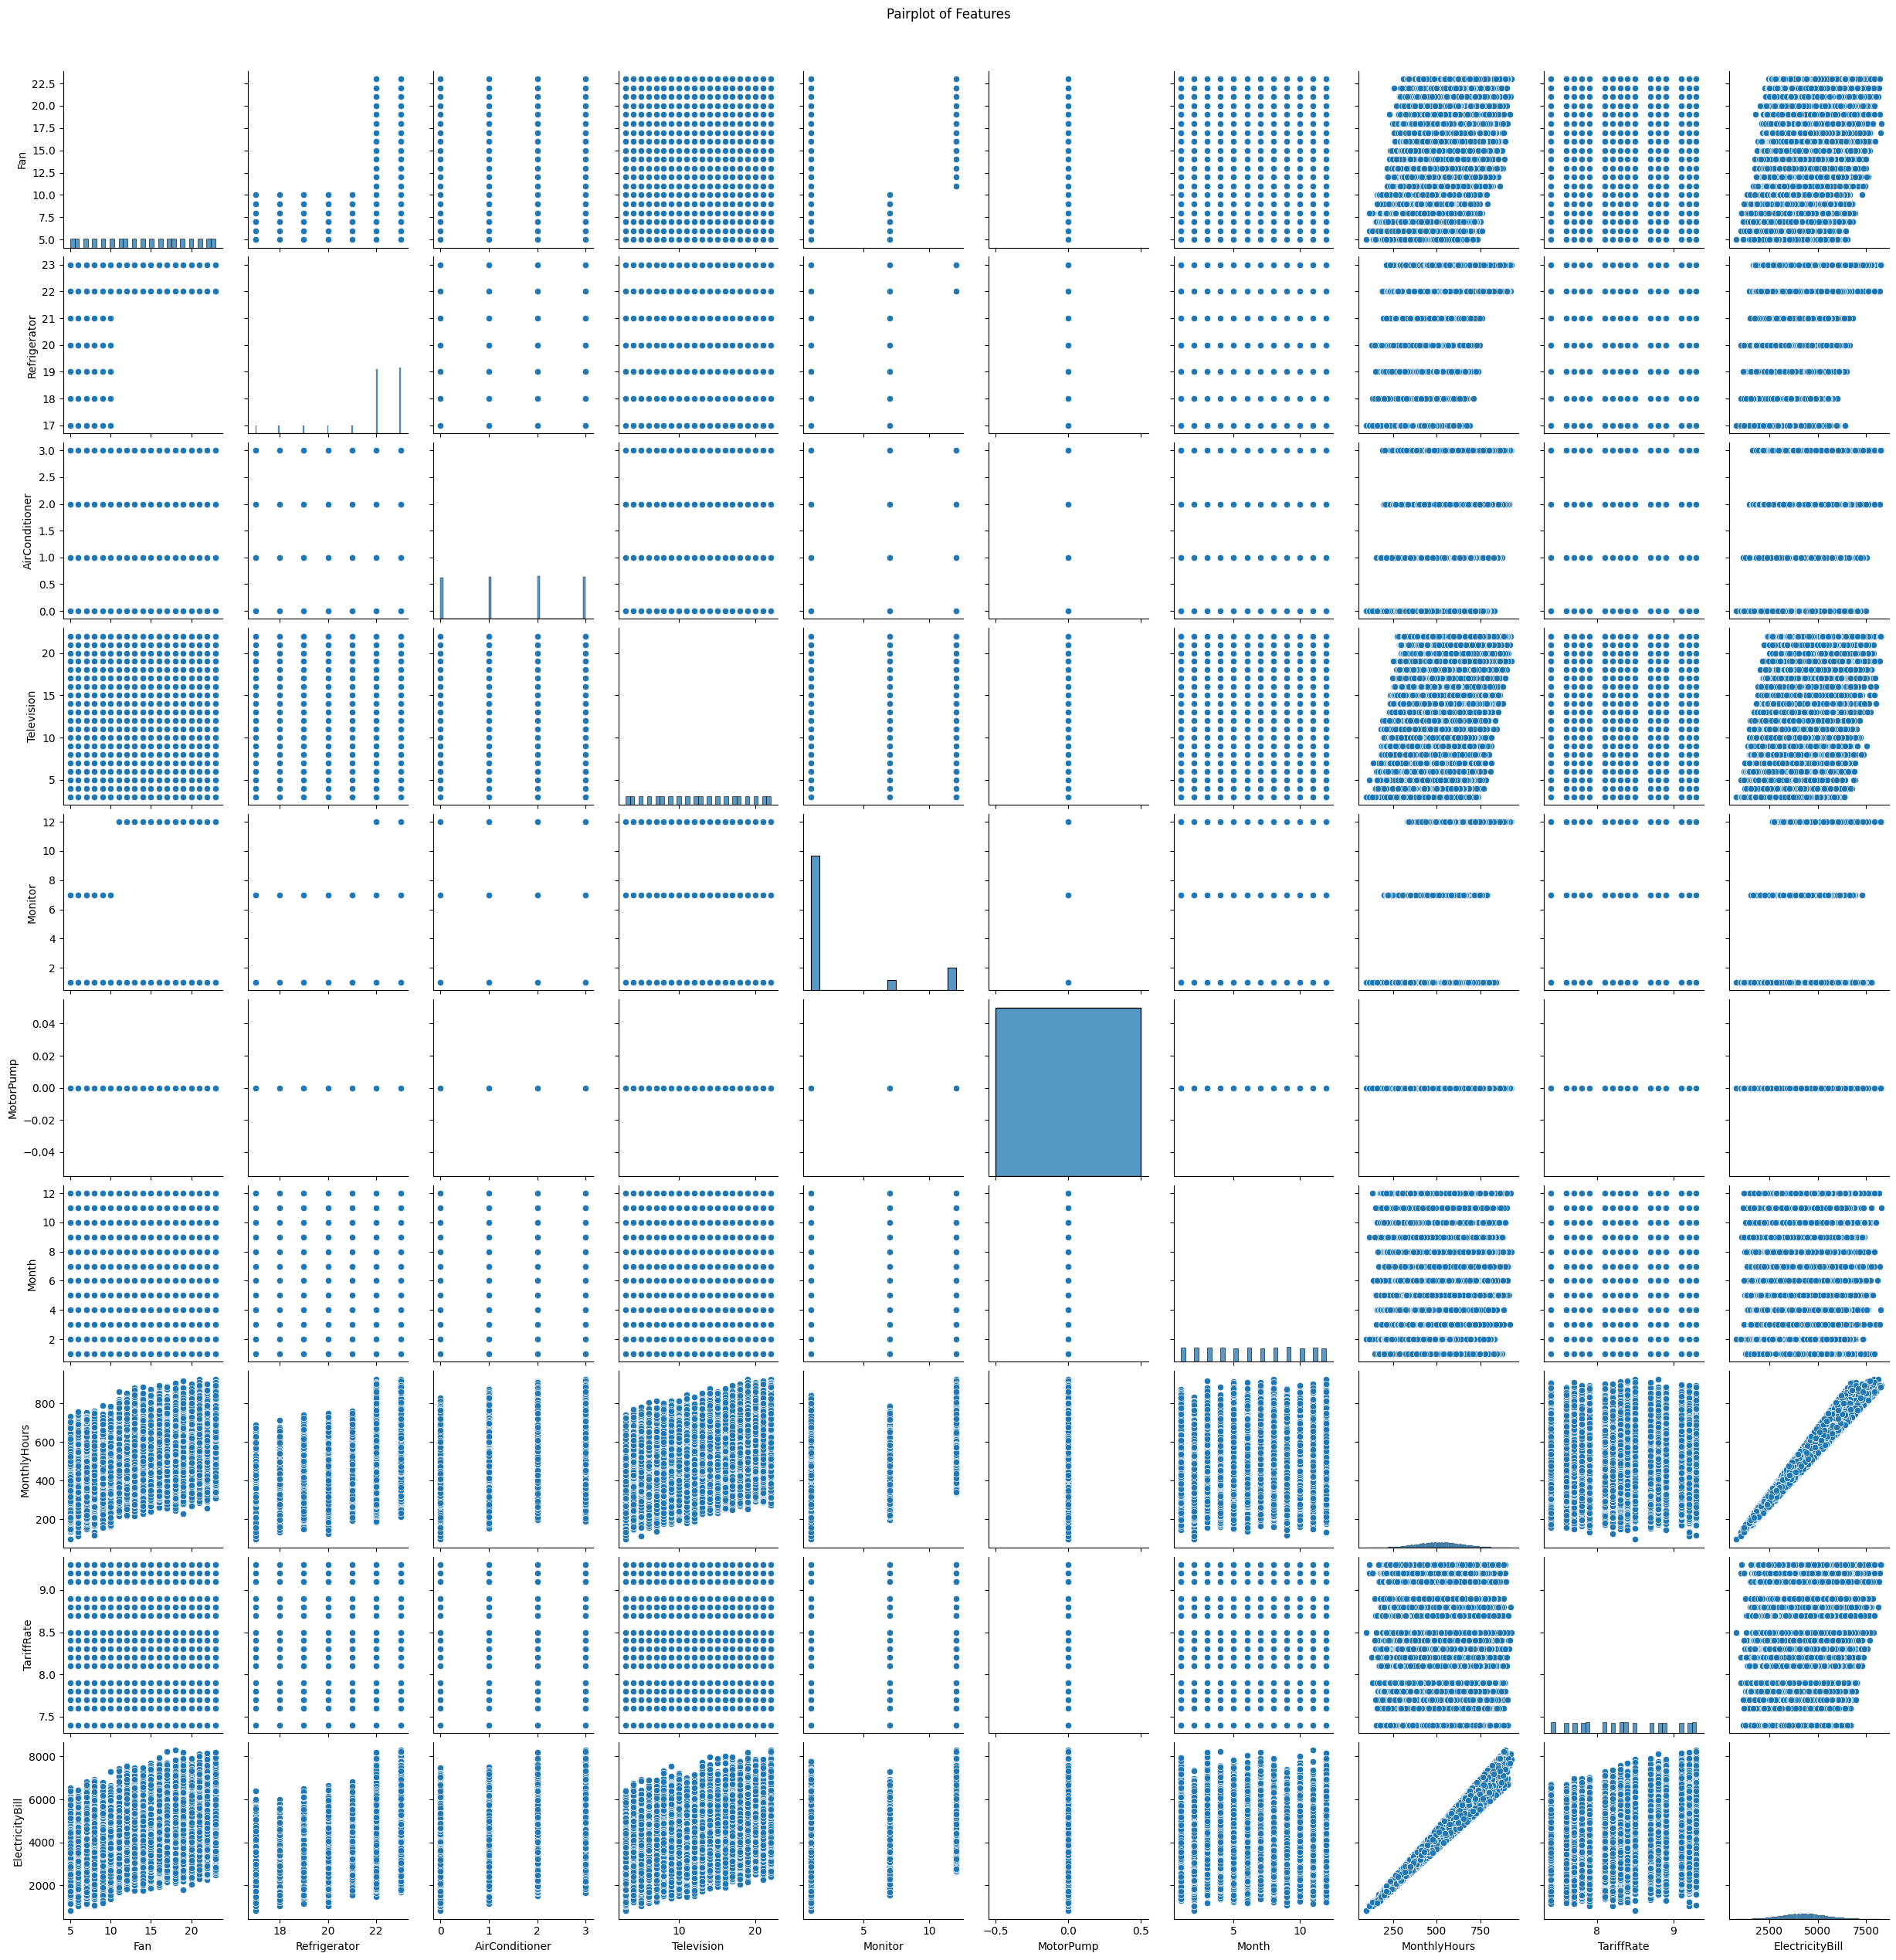

In [ ]:
sns.pairplot(numerical_data)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

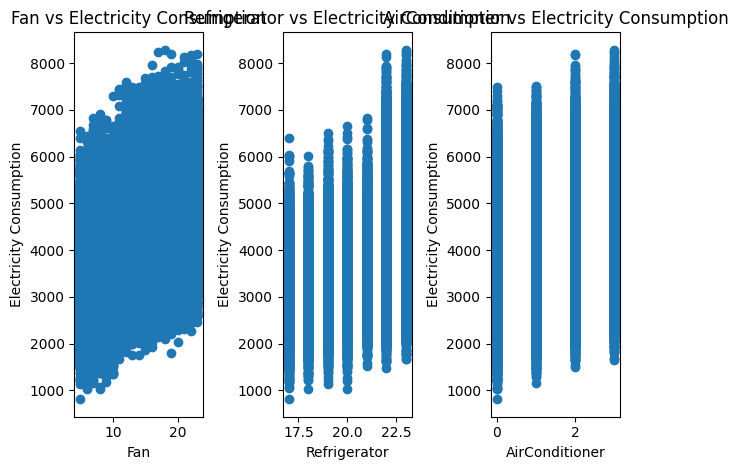

In [ ]:
features_to_check = ['Fan', 'Refrigerator', 'AirConditioner']

for i, col in enumerate(features_to_check):
    plt.subplot(1, 3, i+1)
    plt.scatter(elec_data[col], elec_data['ElectricityBill'])
    plt.xlabel(col)
    plt.ylabel('Electricity Consumption')
    plt.title(f'{col} vs Electricity Consumption')
plt.tight_layout()
plt.show()

In [ ]:
X = elec_data[features_to_check]
y = elec_data['ElectricityBill']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

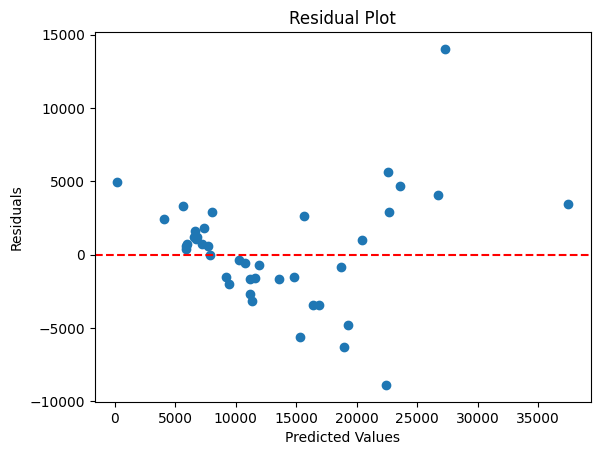

In [ ]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

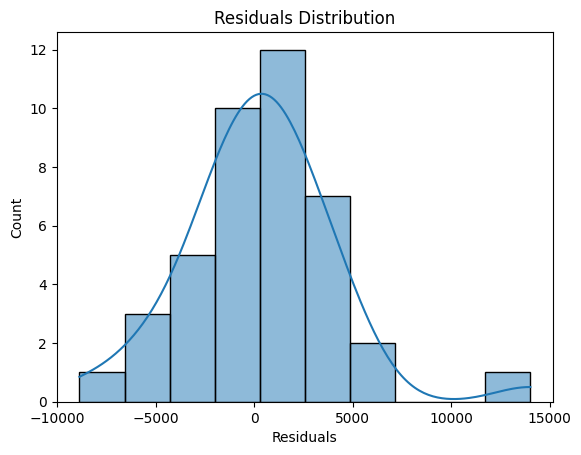

In [ ]:
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

# **BRIEF ANSWERS FOR THEORY:**

 For linear regression, we checked assumptions like linearity, homoscedasticity, normality of residuals, and multicollinearity. Scatter plots and residual analysis showed that relationships between features and the target variable (electricity consumption) appear approximately linear, with a reasonable spread in residuals. Thus, linear regression may be appropriate for this dataset.


 Based on our analysis, linear regression appears appropriate as the data approximately meets the key assumptions. The scatter plots suggest linear relationships between independent variables (such as the number of residents and average income) and electricity consumption, supporting the use of linear regression.